In [512]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

In [549]:
url = 'votes_filtered.xlsx'
url2 = 'contestants.csv'

votes_df = pd.read_excel(url)
c_df = pd.read_csv(url2)

In [514]:
c_df.drop_duplicates(inplace=True)

In [515]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 560
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               322 non-null    int64  
 1   to_country_id      322 non-null    object 
 2   to_country         322 non-null    object 
 3   performer          322 non-null    object 
 4   song               322 non-null    object 
 5   place_contest      320 non-null    float64
 6   sf_num             0 non-null      float64
 7   running_final      206 non-null    float64
 8   running_sf         0 non-null      float64
 9   place_final        206 non-null    float64
 10  points_final       206 non-null    float64
 11  place_sf           0 non-null      float64
 12  points_sf          0 non-null      float64
 13  points_tele_final  206 non-null    float64
 14  points_jury_final  206 non-null    float64
 15  points_tele_sf     0 non-null      float64
 16  points_jury_sf     0 non-n

In [516]:
c_df.drop(['youtube_url',
           'lyrics', 
           'lyricists', 
           'composers', 
           'points_tele_sf', 
           'points_jury_sf',
           'points_sf', 
           'place_sf', 
           'running_sf',
           'sf_num',
           'running_final',
           'place_contest'], axis=1, inplace=True)

In [517]:
remove_low_years = c_df[c_df['year'] < 2016].index
c_df.drop(remove_low_years, axis=0, inplace=True)

In [518]:
clean_con_df = c_df[c_df['points_final'] > 0].reset_index()

In [519]:
clean_con_df['diff'] = clean_con_df['points_jury_final'] - clean_con_df['points_tele_final']

In [520]:
clean_con_df.sort_values('diff', ascending=False)

,index,year,to_country_id,to_country,performer,song,place_final,points_final,points_tele_final,points_jury_final,diff
58,90,2018,se,Sweden,Benjamin Ingrosso,Dance You Off,7.0,274.0,21.0,253.0,232.0
54,86,2018,at,Austria,Cesár Sampson,Nobody But You,3.0,342.0,71.0,271.0,200.0
160,373,2019,mk,North MacedoniaN.Macedonia,Tamara Todevska,Proud,7.0,305.0,58.0,247.0,189.0
34,50,2017,au,Australia,Isaiah,Don't Come Easy,9.0,173.0,2.0,171.0,169.0
84,133,2021,mt,Malta,Destiny,Je Me Casse,7.0,255.0,47.0,208.0,161.0
...,...,...,...,...,...,...,...,...,...,...,...
104,167,2023,fi,Finland,Käärijä,Cha Cha Cha,2.0,526.0,376.0,150.0,-226.0
2,2,2016,ru,Russia,Sergey Lazarev,You Are the Only One,3.0,491.0,361.0,130.0,-231.0
180,447,2022,ua,Ukraine,Kalush Orchestra,Stefania,1.0,631.0,439.0,192.0,-247.0
159,372,2019,no,Norway,KEiiNO,Spirit in the Sky,6.0,331.0,291.0,40.0,-251.0


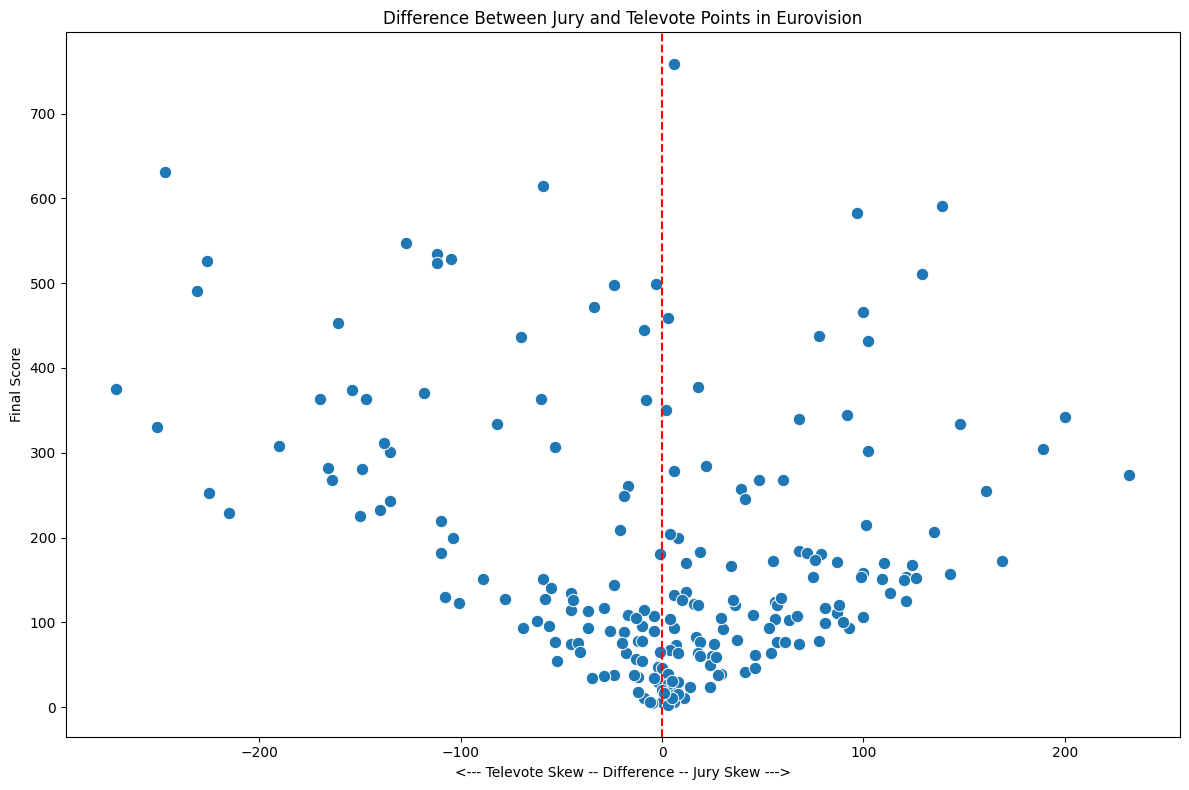

In [521]:
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=clean_con_df, x='diff', y='points_final', s=80)

# Add reference line at x=0
plt.axvline(x=0, color='r', linestyle='--')

# Customize the labels and title
plt.xlabel('<--- Televote Skew -- Difference -- Jury Skew --->')
plt.ylabel('Final Score')
plt.title('Difference Between Jury and Televote Points in Eurovision')

# Display the plot
plt.tight_layout()
plt.show()

In [522]:
clean_con_df.to_csv('cleaned_df_votes.csv')

In [523]:
# countries = clean_con_df['to_country'].unique().tolist()

# mean_dict = {}

# for country in countries:
#     avg = mean(clean_con_df['diff'][clean_con_df['to_country'] == country])
#     mean_dict.update({country: avg})
    
avg_diff_by_country = clean_con_df.groupby('to_country')['diff'].mean().sort_values(ascending=False)
# len(avg_diff_by_country.index.tolist())
# len(avg_diff_by_country.values.tolist())

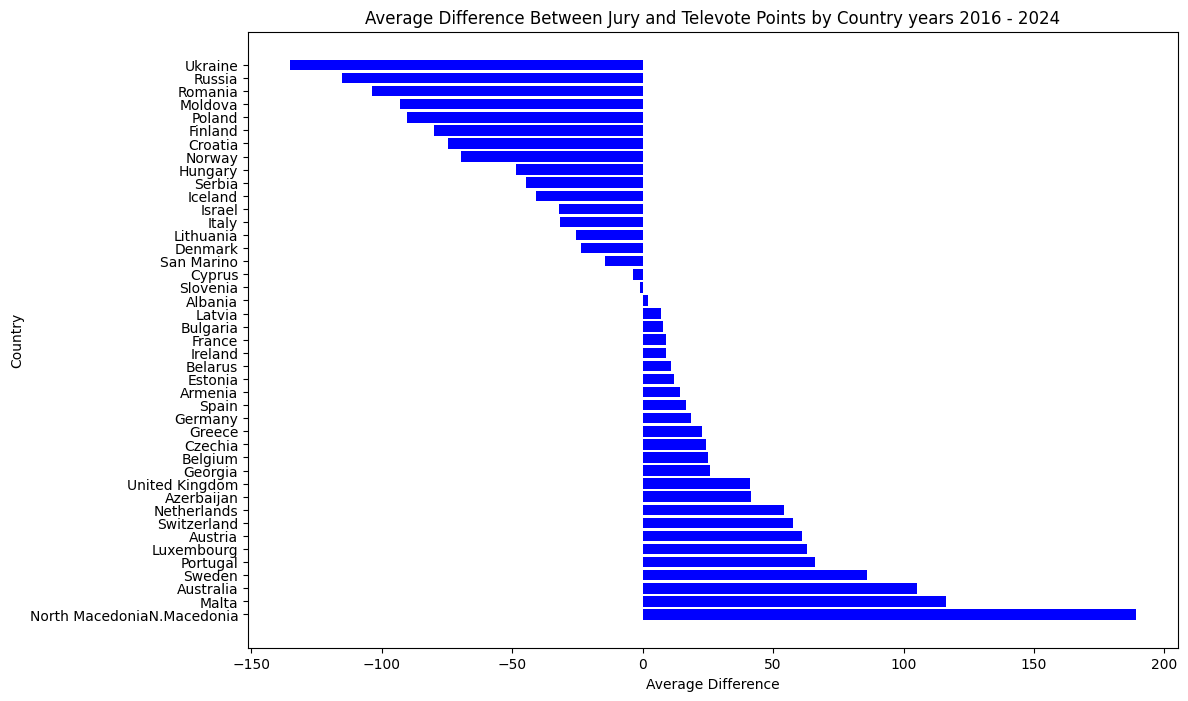

In [524]:
# Extracting data from the dictionary
# countries = list(mean_dict.keys())
# avg_diffs = list(mean_dict.values())

countries = avg_diff_by_country.index.tolist()
avg_diffs = avg_diff_by_country.values.tolist()

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(countries, avg_diffs, color='Blue')
plt.xlabel('Average Difference')
plt.ylabel('Country')
plt.title('Average Difference Between Jury and Televote Points by Country years 2016 - 2024')
plt.show()

In [525]:
t = clean_con_df.copy()

In [526]:
# # t['%_of_jury_bias'] 

# bias_dict = []
# counter = 0
# participation = 0

# for country in t['to_country']:
#     for difference in t[t['to_country'] == country]['diff']:
#         participation += 1
#         if difference > 0:
#             counter += 1
            
#     bias_dict.append({'country': country, 'jury_over_tele': counter, 'participation': participation})
#     counter = 0
#     participation = 0
    
# # bias_dict

In [527]:
data = []
countries = t['to_country'].unique()

for country in countries:
    country_df = t[t['to_country'] == country]
    jury_over_tele = (country_df['diff'] > 0).sum()
    participation = country_df.shape[0]
    data.append({'country': country, 'jury_over_tele': jury_over_tele, 'participation': participation})

bias_df = pd.DataFrame(data)
bias_df['%_jury_over_tele'] = round(bias_df['jury_over_tele'] / bias_df['participation'], 2)


In [528]:
bias_df.sort_values(['%_jury_over_tele', 'participation'], ascending=False, inplace=True)

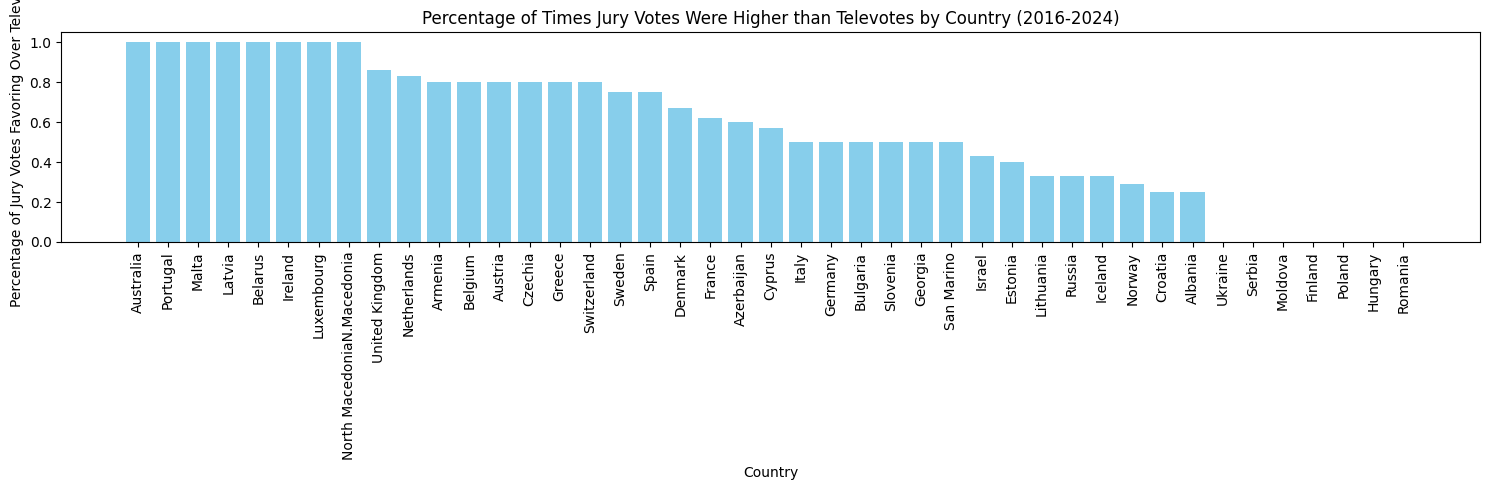

In [529]:
# missing 2019 & 2020

plt.figure(figsize=(15, 5))
bars = plt.bar(bias_df['country'], bias_df['%_jury_over_tele'], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Percentage of Jury Votes Favoring Over Televotes')
plt.title('Percentage of Times Jury Votes Were Higher than Televotes by Country (2016-2024)')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [546]:
# bias_df[bias_df['country'] == 'Sweden']
# clean_con_df['year'].value_counts().sort_index()
# print(clean_con_df.shape[0])
# plt.hist(clean_con_df["diff"], 20)
# plt.show()

In [534]:
bias_df.to_csv('bias_df.csv')

In [563]:
region_mapping = {
    'Western Europe': ['France', 'Belgium', 'Netherlands', 'Austria', 'Italy', 'Spain', 'United Kingdom', 'Germany', 'Portugal', 'Switzerland', 'Ireland'],
    'Eastern Europe': ['Ukraine', 'Russia', 'Bulgaria', 'Armenia', 'Poland', 'Lithuania', 'Hungary', 'Georgia', 'Belarus', 'Moldova', 'Romania', 'Czechia', 'Estonia', 'Albania', 'Slovenia', 'North MacedoniaN.Macedonia'],
    'Northern Europe': ['Sweden', 'Latvia', 'Denmark', 'Norway', 'Finland', 'Iceland'],
    'Southern Europe': ['Cyprus', 'Greece', 'Malta', 'San Marino', 'Croatia', 'Serbia'],
    'Middle East': ['Israel', 'Azerbaijan'],
    'Australia': ['Australia'],
}

country_to_region = {country: region for region, countries in region_mapping.items() for country in countries}


votes_df['from_region'] = votes_df['from_country'].map(country_to_region)
votes_df['to_region'] = votes_df['to_country'].map(country_to_region)

country_to_region


# Save the updated DataFrame to a new Excel file
# votes_df.to_excel('votes_with_regions.xlsx', index=False)


{'France': 'Western Europe',
 'Belgium': 'Western Europe',
 'Netherlands': 'Western Europe',
 'Austria': 'Western Europe',
 'Italy': 'Western Europe',
 'Spain': 'Western Europe',
 'United Kingdom': 'Western Europe',
 'Germany': 'Western Europe',
 'Portugal': 'Western Europe',
 'Switzerland': 'Western Europe',
 'Ireland': 'Western Europe',
 'Ukraine': 'Eastern Europe',
 'Russia': 'Eastern Europe',
 'Bulgaria': 'Eastern Europe',
 'Armenia': 'Eastern Europe',
 'Poland': 'Eastern Europe',
 'Lithuania': 'Eastern Europe',
 'Hungary': 'Eastern Europe',
 'Georgia': 'Eastern Europe',
 'Belarus': 'Eastern Europe',
 'Moldova': 'Eastern Europe',
 'Romania': 'Eastern Europe',
 'Czechia': 'Eastern Europe',
 'Estonia': 'Eastern Europe',
 'Albania': 'Eastern Europe',
 'Slovenia': 'Eastern Europe',
 'North MacedoniaN.Macedonia': 'Eastern Europe',
 'Sweden': 'Northern Europe',
 'Latvia': 'Northern Europe',
 'Denmark': 'Northern Europe',
 'Norway': 'Northern Europe',
 'Finland': 'Northern Europe',
 'Icel